Prüfung für den Trainingsdatensatz:
Alle Bildnamen sind eindeutig.
Prüfung für den Validierungsdatensatz:
Alle Bildnamen sind eindeutig.


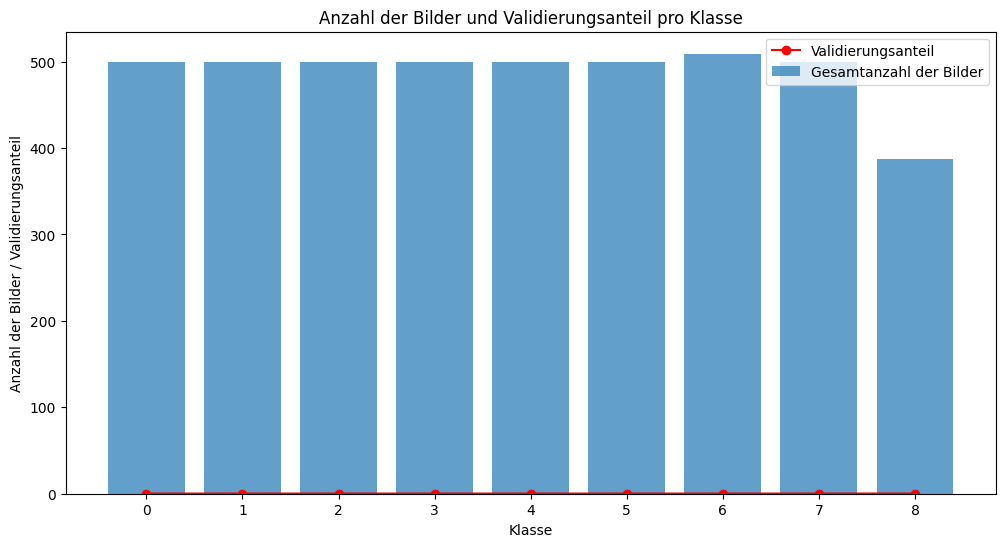

In [2]:
import os
from collections import Counter
import matplotlib.pyplot as plt

# Pfad zu den Ordnern
base_path = r"C:\Uni\python\data\Klassifikation\Dataset"
train_path = os.path.join(base_path, 'train')
valid_path = os.path.join(base_path, 'valid')

def check_unique_filenames(folder_path):
    """Prüft, ob alle Bildnamen in einem Verzeichnis einzigartig sind."""
    all_filenames = []
    for class_folder in os.listdir(folder_path):
        class_path = os.path.join(folder_path, class_folder)
        if os.path.isdir(class_path):
            all_filenames.extend(os.listdir(class_path))
    # Prüfen auf Duplikate
    duplicates = [item for item, count in Counter(all_filenames).items() if count > 1]
    if duplicates:
        print("Nicht eindeutige Bildnamen gefunden:", duplicates)
    else:
        print("Alle Bildnamen sind eindeutig.")

def count_images_per_class(folder_path):
    """Zählt die Anzahl der Bilder in jedem Klassenordner."""
    class_counts = {}
    for class_folder in os.listdir(folder_path):
        class_path = os.path.join(folder_path, class_folder)
        if os.path.isdir(class_path):
            class_counts[class_folder] = len(os.listdir(class_path))
    return class_counts

# Prüfen auf eindeutige Bildnamen
print("Prüfung für den Trainingsdatensatz:")
check_unique_filenames(train_path)
print("Prüfung für den Validierungsdatensatz:")
check_unique_filenames(valid_path)

# Zählen der Bilder pro Klasse
train_counts = count_images_per_class(train_path)
valid_counts = count_images_per_class(valid_path)

# Gesamte Anzahl der Bilder pro Klasse
all_classes = sorted(set(train_counts.keys()).union(set(valid_counts.keys())))
total_counts = [train_counts.get(cls, 0) + valid_counts.get(cls, 0) for cls in all_classes]
valid_ratios = [
    (valid_counts.get(cls, 0) / total if total > 0 else 0)
    for cls, total in zip(all_classes, total_counts)
]

# Diagramm erstellen
plt.figure(figsize=(12, 6))

# Balkendiagramm: Gesamtanzahl der Bilder
plt.bar(all_classes, total_counts, label='Gesamtanzahl der Bilder', alpha=0.7)

# Linienplot: Validierungsanteil
plt.plot(all_classes, valid_ratios, label='Validierungsanteil', marker='o', color='red')

# Beschriftung und Titel
plt.xlabel('Klasse')
plt.ylabel('Anzahl der Bilder / Validierungsanteil')
plt.title('Anzahl der Bilder und Validierungsanteil pro Klasse')
plt.legend()

# Diagramm anzeigen
plt.show()


Prüfung für den Trainingsdatensatz:
Alle Bildnamen sind eindeutig.
Prüfung für den Validierungsdatensatz:
Alle Bildnamen sind eindeutig.


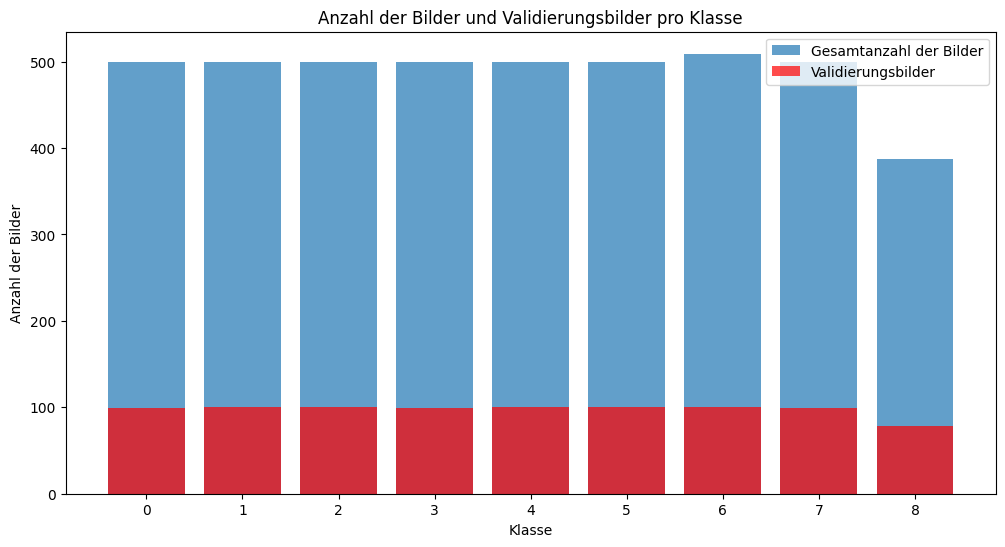

In [5]:
import os
from collections import Counter
import matplotlib.pyplot as plt

# Pfad zu den Ordnern
base_path = r"C:\Uni\python\data\Klassifikation\Dataset"
train_path = os.path.join(base_path, 'train')
valid_path = os.path.join(base_path, 'valid')

def check_unique_filenames(folder_path):
    """Prüft, ob alle Bildnamen in einem Verzeichnis einzigartig sind."""
    all_filenames = []
    for class_folder in os.listdir(folder_path):
        class_path = os.path.join(folder_path, class_folder)
        if os.path.isdir(class_path):
            all_filenames.extend(os.listdir(class_path))
    # Prüfen auf Duplikate
    duplicates = [item for item, count in Counter(all_filenames).items() if count > 1]
    if duplicates:
        print("Nicht eindeutige Bildnamen gefunden:", duplicates)
    else:
        print("Alle Bildnamen sind eindeutig.")

def count_images_per_class(folder_path):
    """Zählt die Anzahl der Bilder in jedem Klassenordner."""
    class_counts = {}
    for class_folder in os.listdir(folder_path):
        class_path = os.path.join(folder_path, class_folder)
        if os.path.isdir(class_path):
            class_counts[class_folder] = len(os.listdir(class_path))
    return class_counts

# Prüfen auf eindeutige Bildnamen
print("Prüfung für den Trainingsdatensatz:")
check_unique_filenames(train_path)
print("Prüfung für den Validierungsdatensatz:")
check_unique_filenames(valid_path)

# Zählen der Bilder pro Klasse
train_counts = count_images_per_class(train_path)
valid_counts = count_images_per_class(valid_path)

# Gesamte Anzahl der Bilder pro Klasse
all_classes = sorted(set(train_counts.keys()).union(set(valid_counts.keys())))
total_counts = [train_counts.get(cls, 0) + valid_counts.get(cls, 0) for cls in all_classes]
valid_counts_list = [valid_counts.get(cls, 0) for cls in all_classes]

# Diagramm erstellen
plt.figure(figsize=(12, 6))

# Balkendiagramm: Gesamtanzahl der Bilder
plt.bar(all_classes, total_counts, label='Gesamtanzahl der Bilder', alpha=0.7)

# Balkendiagramm: Anzahl der Validierungsbilder
plt.bar(all_classes, valid_counts_list, label='Validierungsbilder', alpha=0.7, color='red')

# Beschriftung und Titel
plt.xlabel('Klasse')
plt.ylabel('Anzahl der Bilder')
plt.title('Anzahl der Bilder und Validierungsbilder pro Klasse')
plt.legend()

# Diagramm anzeigen
plt.show()


In [6]:
import os
from PIL import Image
from torchvision import transforms
from tqdm import tqdm

# Pfad zu den Ordnern
base_path = r"C:\Uni\python\data\Klassifikation\Dataset"
train_path = os.path.join(base_path, 'train')
valid_path = os.path.join(base_path, 'valid')

# Zielanzahl der Bilder pro Klasse
TARGET_IMAGES_PER_CLASS = 500

# Bildaugmentation: Transformationen
augmentation = transforms.Compose([
    transforms.RandomRotation(30),
    transforms.RandomHorizontalFlip(),
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.ToTensor(),  # Konvertierung für weitere Transformationen
    transforms.ToPILImage()  # Zurück zu PIL-Bild
])

def count_images_in_class(train_folder, valid_folder):
    """Zählt die Anzahl der Bilder einer Klasse in train und valid."""
    train_images = len(os.listdir(train_folder)) if os.path.exists(train_folder) else 0
    valid_images = len(os.listdir(valid_folder)) if os.path.exists(valid_folder) else 0
    return train_images + valid_images

def augment_images(class_folder, missing_count):
    """Führt Augmentation durch, um die Anzahl der Bilder einer Klasse auszugleichen."""
    image_files = os.listdir(class_folder)
    print(f"Augmentiere Klasse {os.path.basename(class_folder)}: {missing_count} zusätzliche Bilder erforderlich.")
    
    # Augmentation durchführen
    while missing_count > 0:
        for image_file in tqdm(image_files, desc=f"Augmentiere {os.path.basename(class_folder)}"):
            if missing_count <= 0:
                break
            # Originalbild laden
            img_path = os.path.join(class_folder, image_file)
            with Image.open(img_path) as img:
                augmented_img = augmentation(img)
                # Speichern des augmentierten Bildes
                new_image_name = f"aug_{missing_count}_{image_file}"
                augmented_img.save(os.path.join(class_folder, new_image_name))
                missing_count -= 1

# Augmentation für jede Klasse
for class_folder in os.listdir(train_path):
    train_class_path = os.path.join(train_path, class_folder)
    valid_class_path = os.path.join(valid_path, class_folder)
    
    if os.path.isdir(train_class_path):
        # Zählen der Bilder in train + valid
        total_images = count_images_in_class(train_class_path, valid_class_path)
        if total_images >= TARGET_IMAGES_PER_CLASS:
            print(f"Klasse {class_folder} ist bereits balanciert mit {total_images} Bildern.")
            continue

        # Berechnung der fehlenden Bilder
        missing_images = TARGET_IMAGES_PER_CLASS - total_images
        augment_images(train_class_path, missing_images)

print("Augmentation abgeschlossen. Alle Klassen sind jetzt balanciert.")


Klasse 0 ist bereits balanciert mit 500 Bildern.
Klasse 1 ist bereits balanciert mit 500 Bildern.
Klasse 2 ist bereits balanciert mit 500 Bildern.
Klasse 3 ist bereits balanciert mit 500 Bildern.
Klasse 4 ist bereits balanciert mit 500 Bildern.
Klasse 5 ist bereits balanciert mit 500 Bildern.
Klasse 6 ist bereits balanciert mit 509 Bildern.
Klasse 7 ist bereits balanciert mit 500 Bildern.
Augmentiere Klasse 8: 113 zusätzliche Bilder erforderlich.


Augmentiere 8:  37%|███▋      | 113/309 [00:02<00:03, 51.29it/s]

Augmentation abgeschlossen. Alle Klassen sind jetzt balanciert.


Prüfung für den Trainingsdatensatz:
Alle Bildnamen sind eindeutig.
Prüfung für den Validierungsdatensatz:
Alle Bildnamen sind eindeutig.


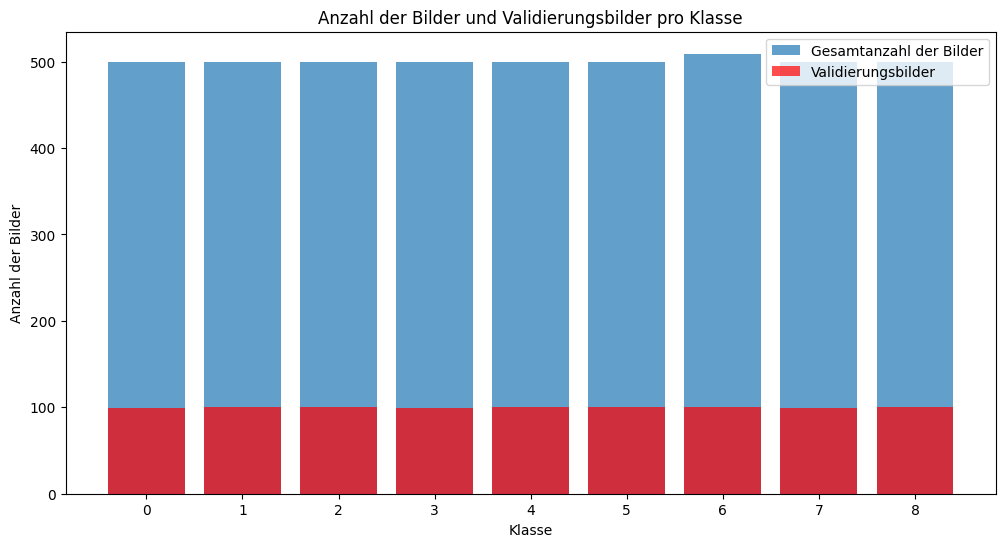

In [10]:
import os
from collections import Counter
import matplotlib.pyplot as plt

# Pfad zu den Ordnern
base_path = r"C:\Uni\python\data\Klassifikation\Dataset"
train_path = os.path.join(base_path, 'train')
valid_path = os.path.join(base_path, 'valid')

def check_unique_filenames(folder_path):
    """Prüft, ob alle Bildnamen in einem Verzeichnis einzigartig sind."""
    all_filenames = []
    for class_folder in os.listdir(folder_path):
        class_path = os.path.join(folder_path, class_folder)
        if os.path.isdir(class_path):
            all_filenames.extend(os.listdir(class_path))
    # Prüfen auf Duplikate
    duplicates = [item for item, count in Counter(all_filenames).items() if count > 1]
    if duplicates:
        print("Nicht eindeutige Bildnamen gefunden:", duplicates)
    else:
        print("Alle Bildnamen sind eindeutig.")

def count_images_per_class(folder_path):
    """Zählt die Anzahl der Bilder in jedem Klassenordner."""
    class_counts = {}
    for class_folder in os.listdir(folder_path):
        class_path = os.path.join(folder_path, class_folder)
        if os.path.isdir(class_path):
            class_counts[class_folder] = len(os.listdir(class_path))
    return class_counts

# Prüfen auf eindeutige Bildnamen
print("Prüfung für den Trainingsdatensatz:")
check_unique_filenames(train_path)
print("Prüfung für den Validierungsdatensatz:")
check_unique_filenames(valid_path)

# Zählen der Bilder pro Klasse
train_counts = count_images_per_class(train_path)
valid_counts = count_images_per_class(valid_path)

# Gesamte Anzahl der Bilder pro Klasse
all_classes = sorted(set(train_counts.keys()).union(set(valid_counts.keys())))
total_counts = [train_counts.get(cls, 0) + valid_counts.get(cls, 0) for cls in all_classes]
valid_counts_list = [valid_counts.get(cls, 0) for cls in all_classes]

# Diagramm erstellen
plt.figure(figsize=(12, 6))

# Balkendiagramm: Gesamtanzahl der Bilder
plt.bar(all_classes, total_counts, label='Gesamtanzahl der Bilder', alpha=0.7)

# Balkendiagramm: Anzahl der Validierungsbilder
plt.bar(all_classes, valid_counts_list, label='Validierungsbilder', alpha=0.7, color='red')

# Beschriftung und Titel
plt.xlabel('Klasse')
plt.ylabel('Anzahl der Bilder')
plt.title('Anzahl der Bilder und Validierungsbilder pro Klasse')
plt.legend()

# Diagramm anzeigen
plt.show()


In [11]:
# Installieren der erforderlichen Pakete und Klonen des YOLOv5-Repositories
!git clone https://github.com/ultralytics/yolov5.git
!pip install -r yolov5/requirements.txt


Cloning into 'yolov5'...



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
import os

# Pfad zu Ihrem Datensatz
dataset_path = r"C:\Uni\python\data\Klassifikation\Dataset_frauehof"

# Überprüfung der Ordnerstruktur
for split in ['train', 'valid', 'test']:
    split_path = os.path.join(dataset_path, split)
    print(f"\nInhalt des '{split}'-Ordners:")
    for cls in os.listdir(split_path):
        class_path = os.path.join(split_path, cls)
        if os.path.isdir(class_path):
            print(f" - Klasse '{cls}': {len(os.listdir(class_path))} Bilder")



Inhalt des 'train'-Ordners:
 - Klasse '0': 401 Bilder
 - Klasse '1': 400 Bilder
 - Klasse '2': 401 Bilder
 - Klasse '3': 400 Bilder
 - Klasse '4': 400 Bilder

Inhalt des 'valid'-Ordners:
 - Klasse '0': 49 Bilder
 - Klasse '1': 50 Bilder
 - Klasse '2': 49 Bilder
 - Klasse '3': 50 Bilder
 - Klasse '4': 50 Bilder

Inhalt des 'test'-Ordners:
 - Klasse '0': 50 Bilder
 - Klasse '1': 50 Bilder
 - Klasse '2': 50 Bilder
 - Klasse '3': 50 Bilder
 - Klasse '4': 50 Bilder
